In [1]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines

# A Visual Analysis of the Coronavirus Pandemic

## Update Data and Import Graphing Functions

In [2]:
#%run create_master_table.ipynb

In [3]:
with open('covid_data.p', 'rb') as f:
    data = pickle.load(f)

In [4]:
%run graphFunctions.ipynb

In [5]:
# Total deaths in most recent date:
from datetime import datetime, timedelta
print(
    #data[data.date == data.date.max()- timedelta(days=200)].deaths_ea.sum(),
    #data[data.date == data.date.max()- timedelta(days=200)].deaths_ejhu.sum(),
    #data[data.date == data.date.max()- timedelta(days=200)].deaths_enyt.sum(),
    data[data.date == data.date.max()- timedelta(days=0)].deaths_rnyt.sum(),
    data[data.date == data.date.max()- timedelta(days=0)].deaths_cdc.sum()
)

392541.0 383881.0


## Section 1: State Totals

### Figure 1.1: Total Deaths by State

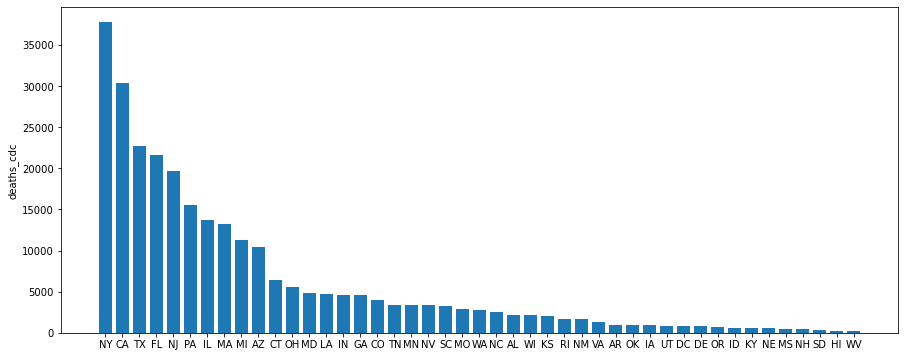

In [6]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc', 200)
# The parameters of this function allow the user to change the data source, and the minimum number of deaths

### Figure 1.2: Total Deaths per 100,000 People by State

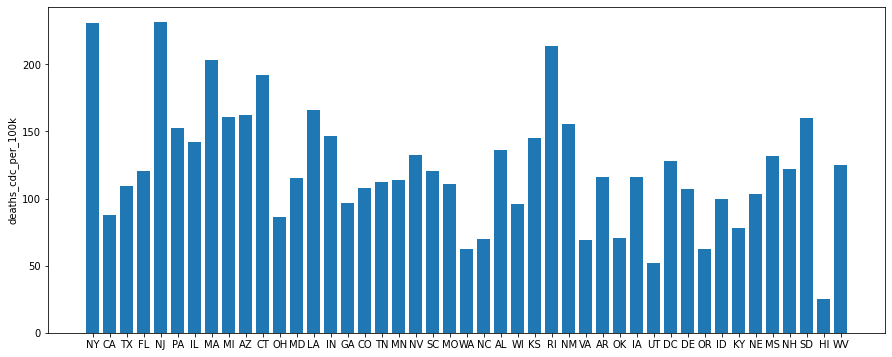

In [7]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc_per_100k', 200)

## Section 2: State Comparisons

### Figure 2.1: Compare Highest Death Rate States (Rank 1-5)

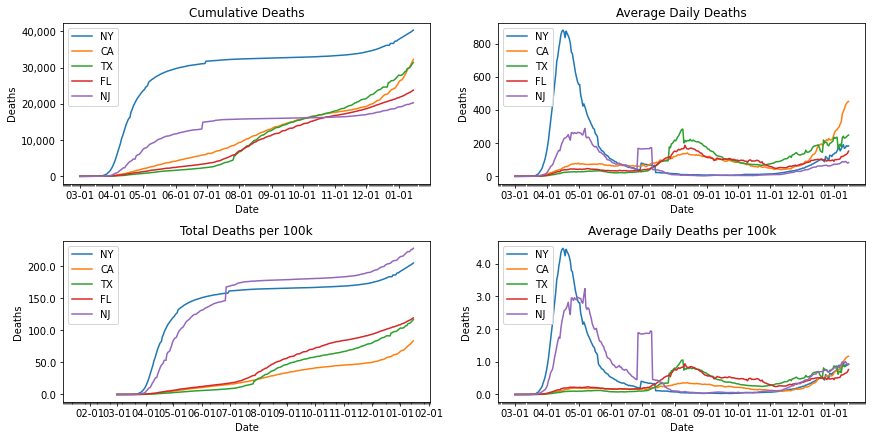

In [8]:
states = ['NY','CA','TX','FL','NJ']
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)
# Parameters of this function allow the user to change the sates selected, the start date shown,
# and the number of days used in the rolling average smoothing on the graphs to the right.

### Figure 2.2: Mobility Reduction for Highest Death Rates (Rank 1-5)

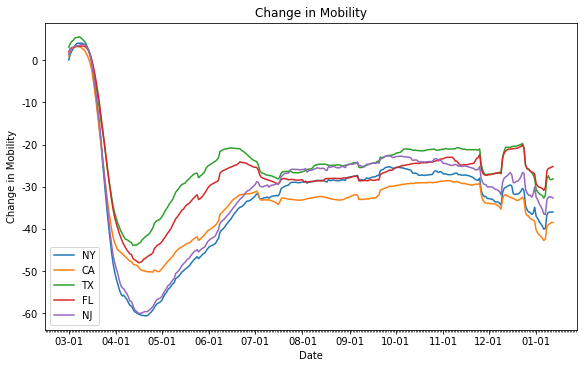

In [9]:
graphMobility(data, states, '2020-03-01', 14)

### Figure 2.3: Compare States with Lower Death Rates

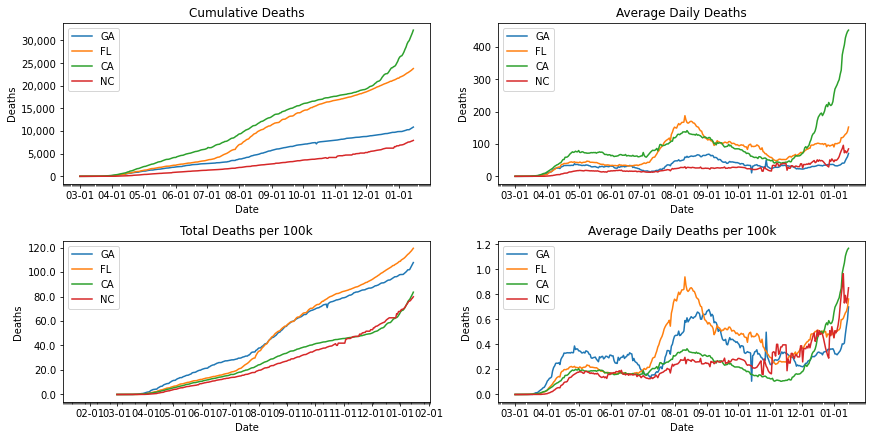

In [10]:
states = ['GA','FL','CA','NC']
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)
# Parameters of this function allow the user to change the sates selected, the start date shown,
# and the number of days used in the rolling average smoothing on the graphs to the right.

### Figure 2.4: Mobility Reduction in Lower Death Rate States

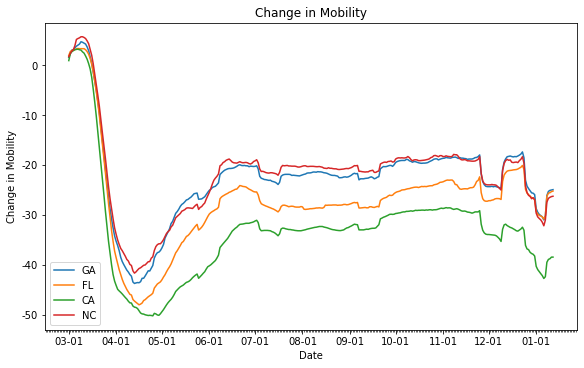

In [11]:
graphMobility(data, states, '2020-03-01', 14)

## Section 3: Single States

### Figure 3.1: New York Cases and Deaths

Cases are shown on the left y-axis, and deaths are shown on the right y-axis in each graph.

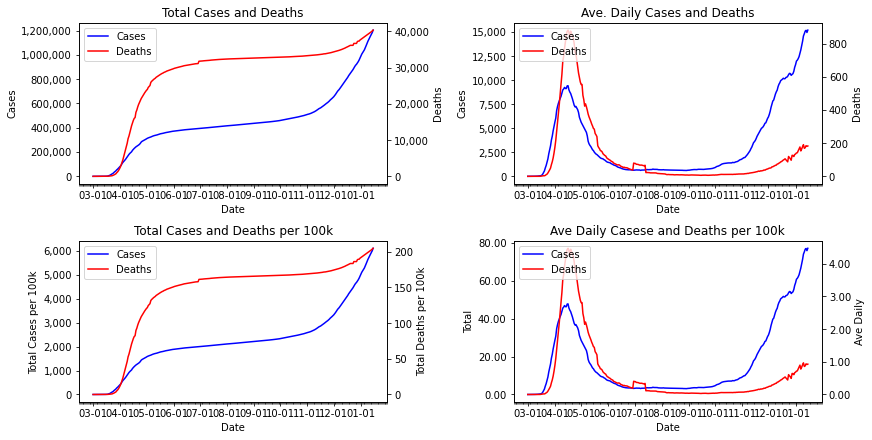

In [12]:
stateGraphs(data, ['NY'],'confirmed_cdc','deaths_cdc', '2020-03-01', 14)
# Parameter allows the user to provide a single or list of states, the coluns used, start date, 
# and time period for rolling average.

### Figure 3.2: New York Death Rates by County

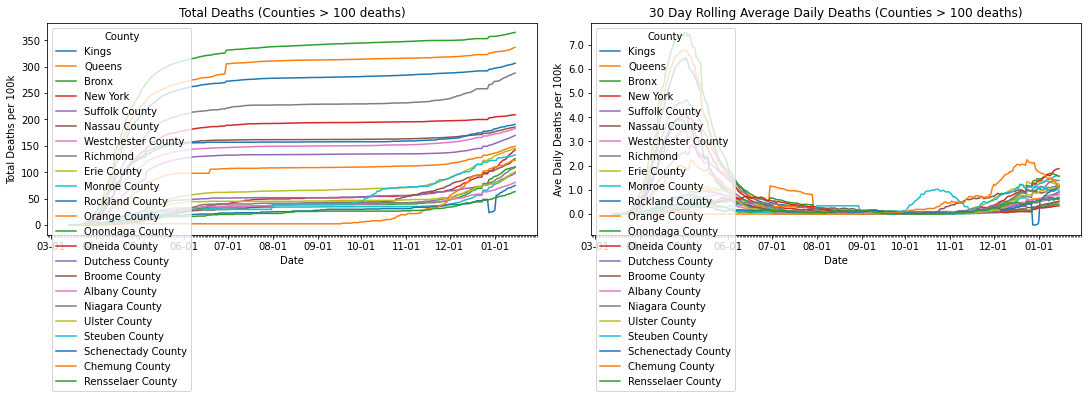

In [13]:
plotCountyDeathCurves(data, state='NY', death_min = 100, rolling_ave = 30, start_date='2020-03-14')
# Parameters allow the user to select a single state, death minimum, start date, and rolling average period

### Figure 3.3: Georgia Cases and Deaths

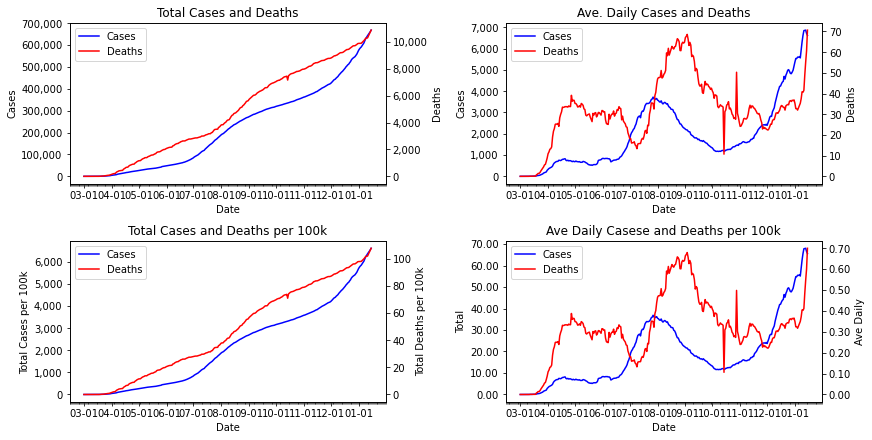

In [14]:
stateGraphs(data, ['GA'],'confirmed_cdc','deaths_cdc', '2020-03-01', 14)

### Figure 3.4: Georgia Death Rates by County

/home/james/.conda/envs/moby/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


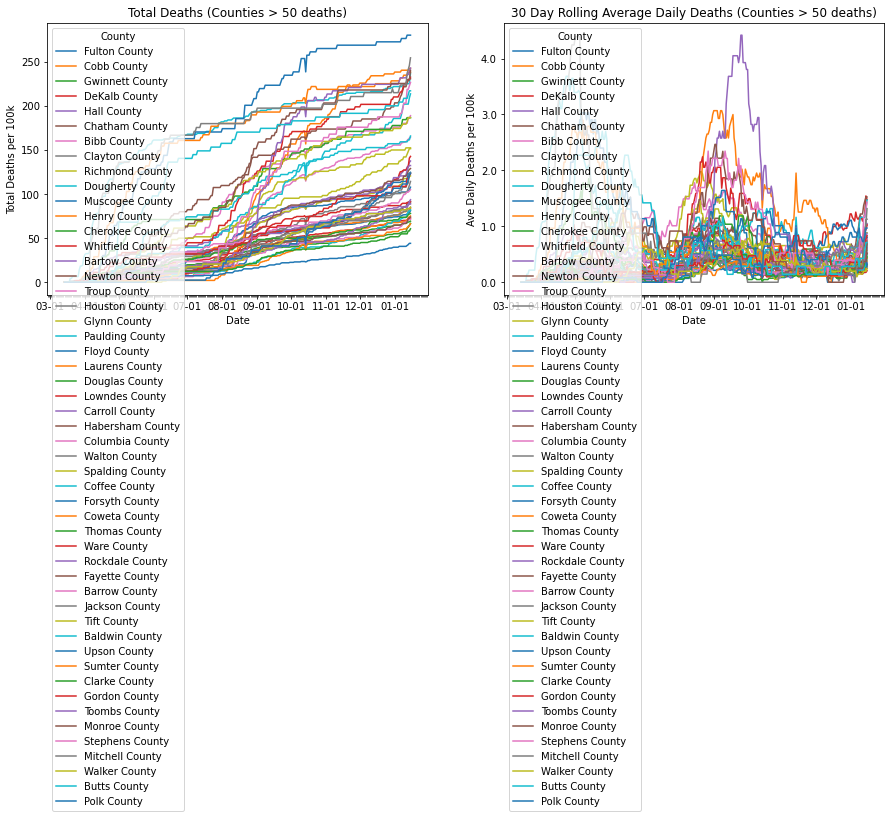

In [15]:
plotCountyDeathCurves(data, state='GA', death_min = 50, rolling_ave = 30, start_date='2020-03-14')

* Dougherty County has death rates in line with some NY counties, while most other death rates remain low.  The article below explains how two funerals contributeds to the spread here.
* https://www.cnn.com/2020/04/02/us/albany-georgia-coronavirus/index.html
* Sumter County has also quickly risen.

## Section 4: Univariate Analysis of County Death Rates

### Figure 4.1: Population Density

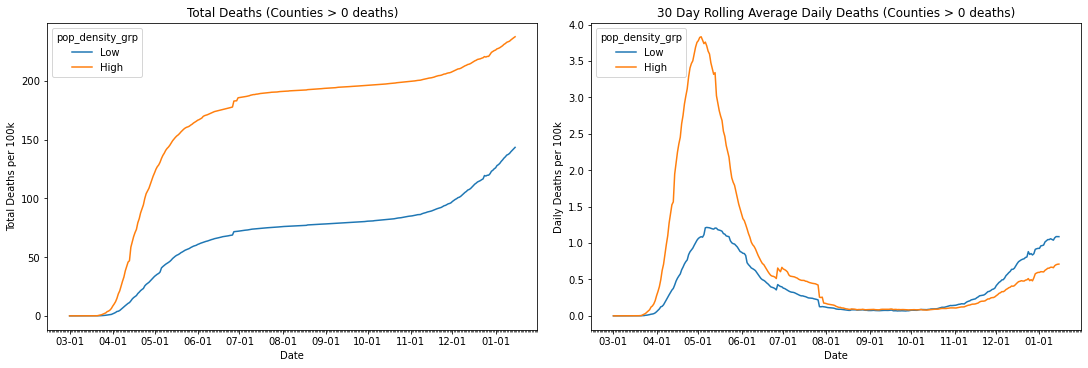

In [16]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pop_density_grp', start_date='2020-03-01')
# Parameters allow a grouping variable to be selected, states to be defined, as well as start date and rolling average parameters
# Already included groupings are:
# pir_grp
# unins_grp
# pop_density_grp
# e_grp
# r_b_grp
# r_w_grp
# age_55_plus_grp

### Figure 4.2: Race

The race definition used here is 'white' as reported in census data.  Low would be 'non-white' and high would be 'white'.

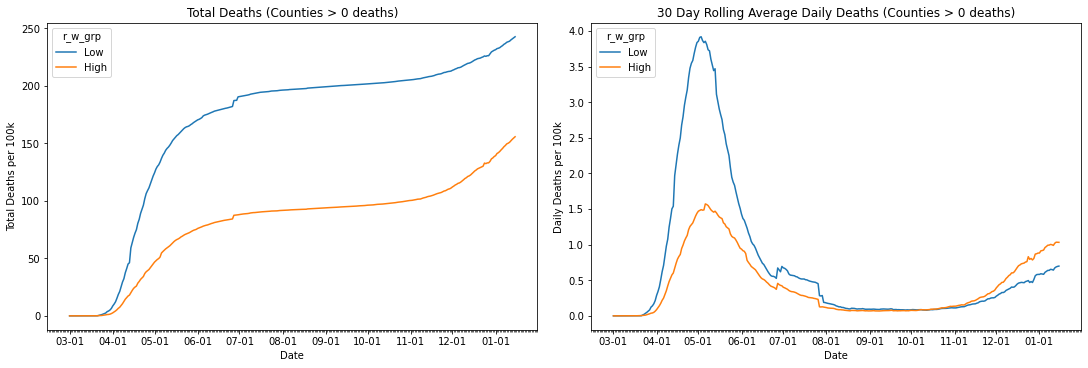

In [17]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='r_w_grp', start_date='2020-03-01')

### Figure 4.2: Uninsured

'Low' are the counties with the lowest percentages of uninsured individuals.

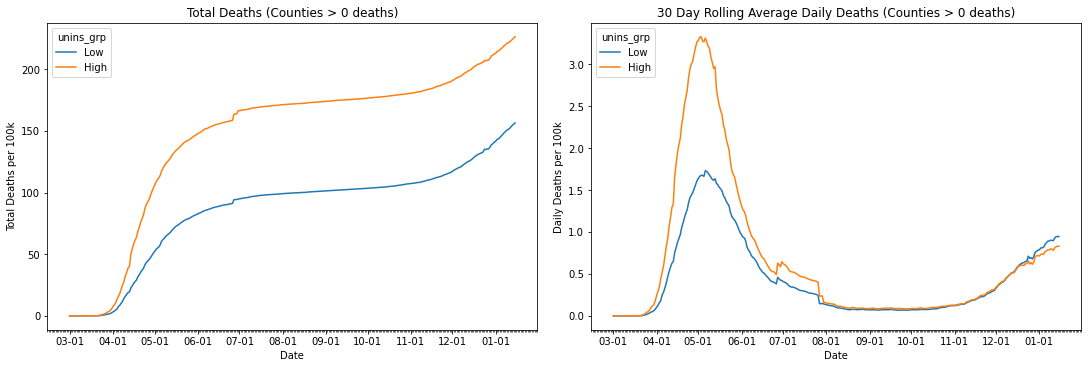

In [18]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='unins_grp', start_date='2020-03-01')

### Figure 4.3: Poverty Income Ratio

'High' are the counties with the highest percentage of PIR > 200%

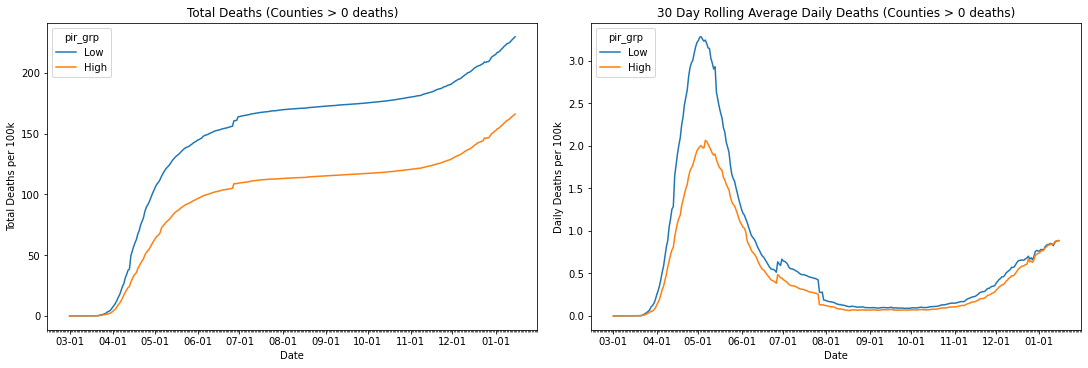

In [19]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pir_grp', start_date='2020-03-01')

### Figure 4.4: Age in NY and NJ

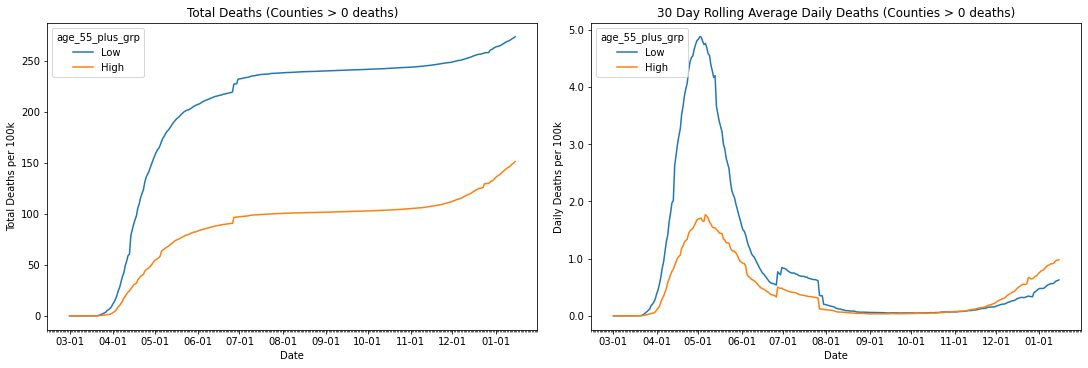

In [20]:
states = ['NY','NJ']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='age_55_plus_grp', start_date='2020-03-01')

### Figure 4.5: Age in CT, MA, MI

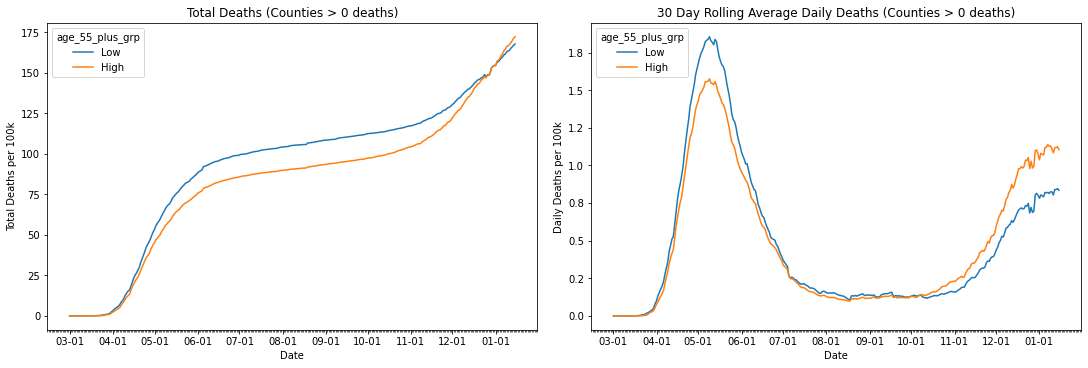

In [21]:
states = ['CT','MA', 'MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='age_55_plus_grp', start_date='2020-03-01')

## Section 5: Multivariate Analysis

### Figure 5.1: Population Density and Age

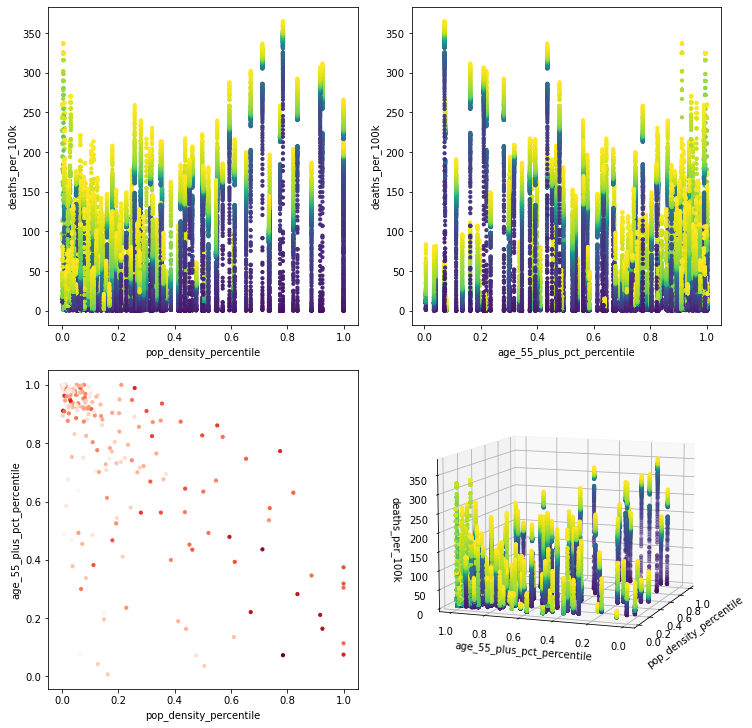

In [22]:
states = ['NY','NJ','CT','MA','MI']
plotInteractions(data, 'pop_density_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

### Figure 5.2: Population Density and Race

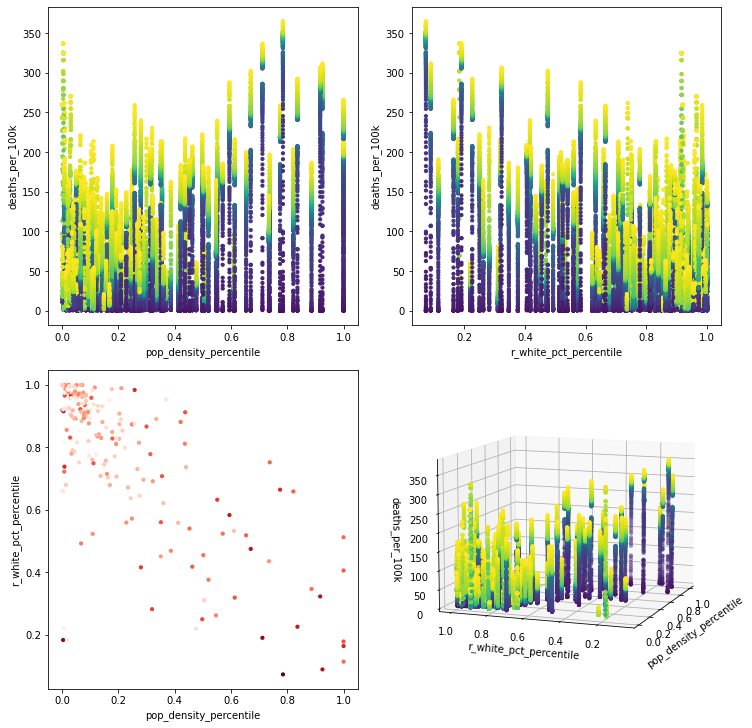

In [23]:
plotInteractions(data, 'pop_density_percentile', 'r_white_pct_percentile', 'deaths_per_100k',states)

### Figure 5.3: Age and Race

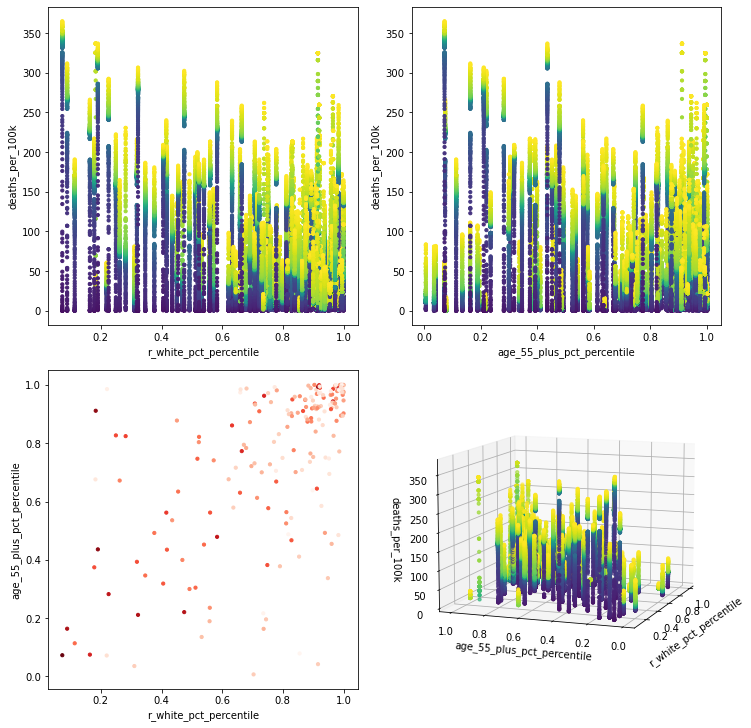

In [24]:
plotInteractions(data, 'r_white_pct_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

### Figure 5.4: Population Density and Race

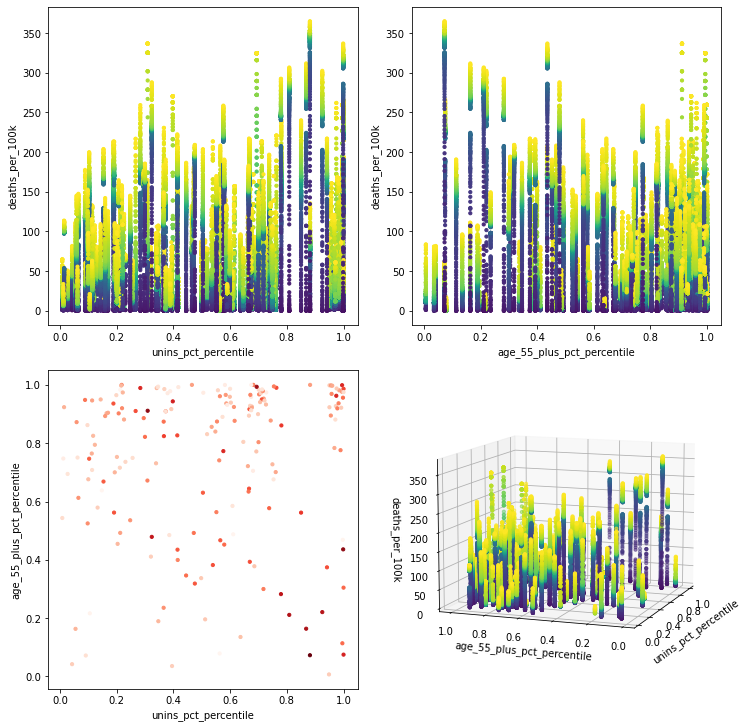

In [25]:
plotInteractions(data, 'unins_pct_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

### Figure 5.5: Race and Uninsured

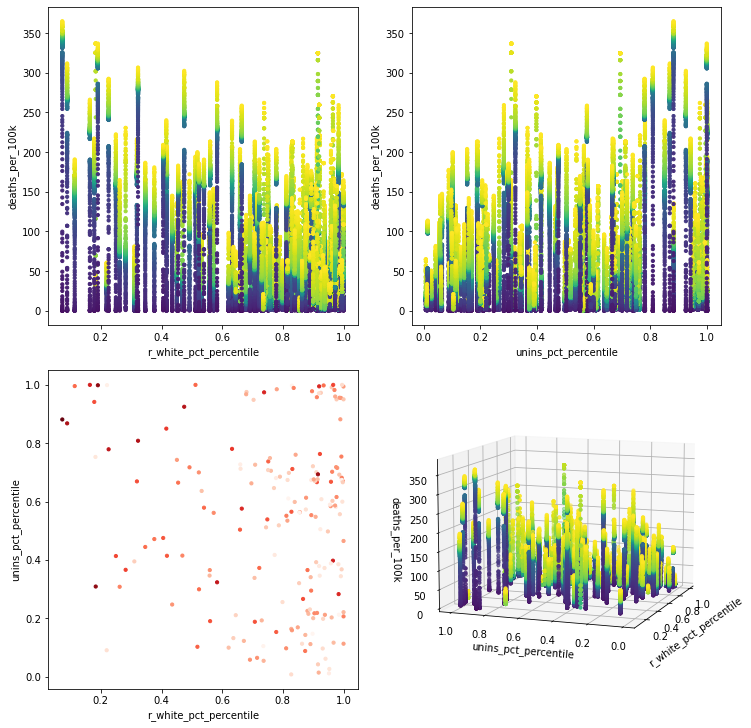

In [26]:
plotInteractions(data, 'r_white_pct_percentile', 'unins_pct_percentile', 'deaths_per_100k',states)